In [1]:
using LinearAlgebra
using Plots
import StatsBase
include("src/Trajectories.jl")
using .QuantumTrajectories

In [2]:
################### Qubit decay example ######################
#### 1. Create the system instance
gamma = 1
sigma_m = [[0.0+0im, 0]  [1, 0]]
sys = System( zeros(ComplexF64, 2, 2), # Hamiltonian
    [sqrt(gamma)*sigma_m ]) #Jump Operators
#### 2. Create the simulation parameters instance
psi0 = zeros(ComplexF64, 2)
psi0[2] = 1 # Initial condition
simulparams = SimulParameters(psi0,
    10.0, # Final time. Set very long so that all trajectories jump
    4, # seed
    100, # Number of trajectories
    10_000, # Number of samples in the finegrid
    1, # Multiplier to use in the fine grid
    1e-3 # Tolerance for passing WTD normalziation
) 
### 3. Run a single trajectory
#data = run_single_trajectory(sys, simulparams)

SimulParameters(psi0=[0.0, 1.0]
nsamples=10000
seed=4
ntraj=100)
multiplier=1.0
tf=10.0
dt=0.001
eps=0.001)

In [3]:
# Stuff for the precomputing 
Qs = Vector{Matrix{ComplexF64}}(undef, simulparams.nsamples)
ts = collect(LinRange(0, simulparams.tf, simulparams.nsamples))

10000-element Vector{Float64}:
  0.0
  0.001000100010001
  0.002000200020002
  0.0030003000300030005
  0.004000400040004
  0.005000500050005001
  0.006000600060006001
  0.0070007000700070005
  0.008000800080008
  0.009000900090009001
  0.010001000100010001
  0.011001100110011
  0.012001200120012002
  ⋮
  9.988998899889989
  9.98999899989999
  9.99099909990999
  9.991999199919992
  9.992999299929993
  9.993999399939995
  9.994999499949994
  9.995999599959996
  9.996999699969997
  9.997999799979999
  9.998999899989998
 10.0

In [4]:
precompute!(sys, 
    simulparams.nsamples, 
    ts, Qs)

In [5]:
psi = Vector{ComplexF64}(undef, 2)
W = Vector{Float64}(undef, simulparams.nsamples)

10000-element Vector{Float64}:
 6.90215079182313e-310
 6.90215079182313e-310
 6.90215079182313e-310
 6.90215079182313e-310
 6.90215079182313e-310
 6.90215079182313e-310
 6.90215079182313e-310
 6.90215079182313e-310
 6.90215079182313e-310
 6.90215079182313e-310
 6.90215079182313e-310
 6.90215079182313e-310
 6.90215079182313e-310
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [14]:
NTRAJ = 10000
times = Vector{Float64}(undef, NTRAJ)
@time begin
    for k in 1:NTRAJ
        times[k] = run_single_trajectory(sys, simulparams, W, psi, ts, Qs, seed=k).times[1]
    end 
end 

 53.818497 seconds (800.57 M allocations: 35.804 GiB, 12.46% gc time)


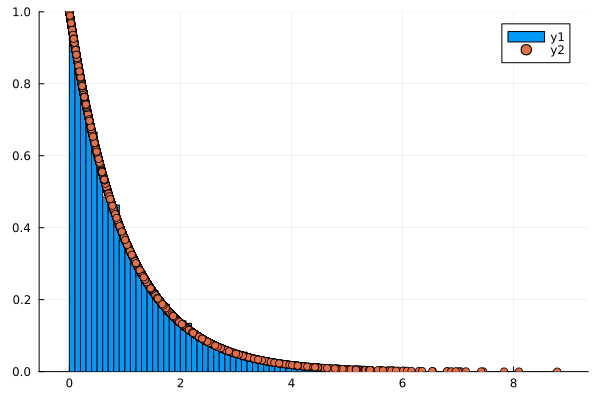

In [15]:
histogram(times, normalize=:pdf)
scatter!(times, exp.(-times))